In [31]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [5]:
file = pd.read_excel("marketing_customer_analysis MODIF.xlsx", engine="openpyxl")

In [6]:
df1=file.copy()

In [21]:
df2=df1.drop(['UNNAMED:_0','Unnamed: 0'], axis=1)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       10910 non-null  object        
 1   STATE                          10910 non-null  object        
 2   CUSTOMER_LIFETIME_VALUE        10910 non-null  float64       
 3   RESPONSE                       10910 non-null  object        
 4   COVERAGE                       10910 non-null  object        
 5   EDUCATION                      10910 non-null  object        
 6   EFFECTIVE_TO_DATE              10910 non-null  datetime64[ns]
 7   EMPLOYMENTSTATUS               10910 non-null  object        
 8   GENDER                         10910 non-null  object        
 9   INCOME                         10910 non-null  int64         
 10  LOCATION_CODE                  10910 non-null  object        
 11  MARITAL_STATUS 

In [23]:
#creo los dataframes numerical y categoricals 
numerical = df2.select_dtypes(include=np.number)

In [24]:
categoricals = df2.select_dtypes(include=object)

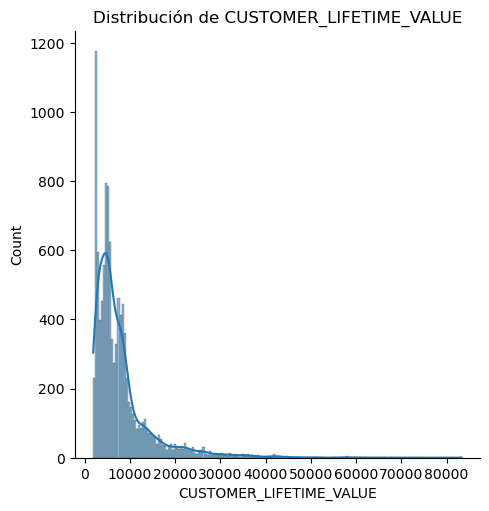

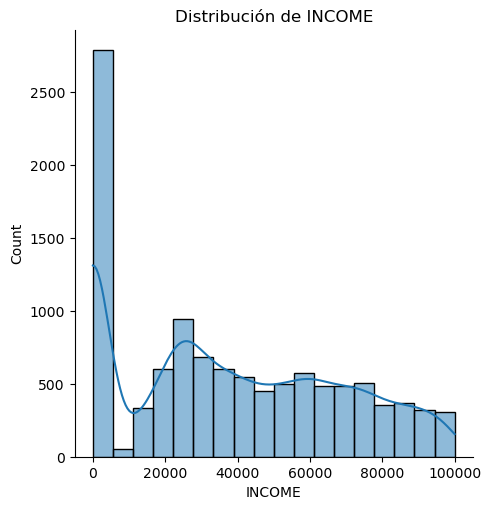

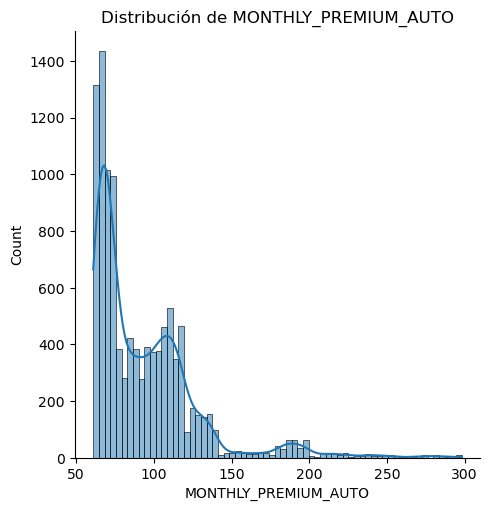

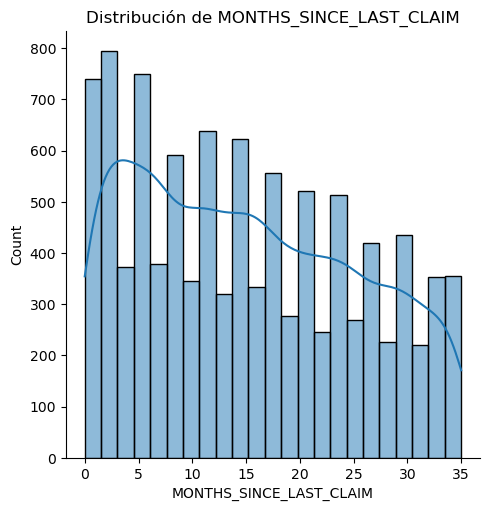

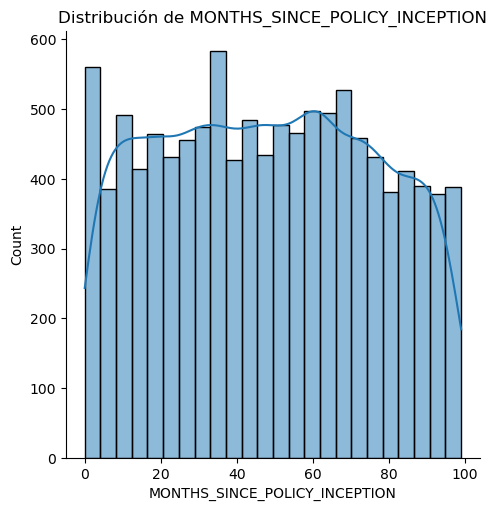

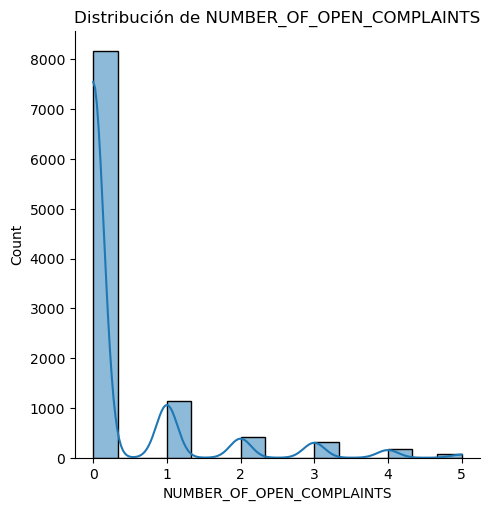

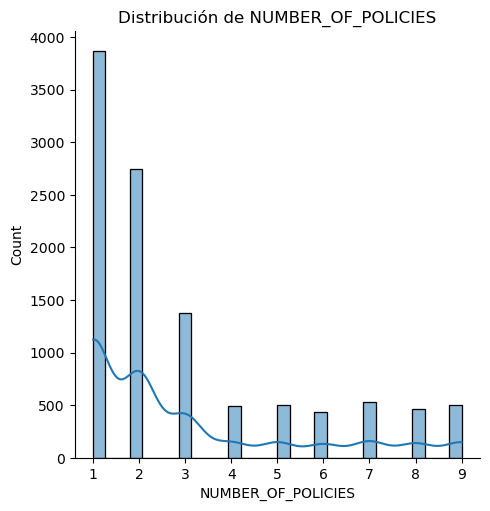

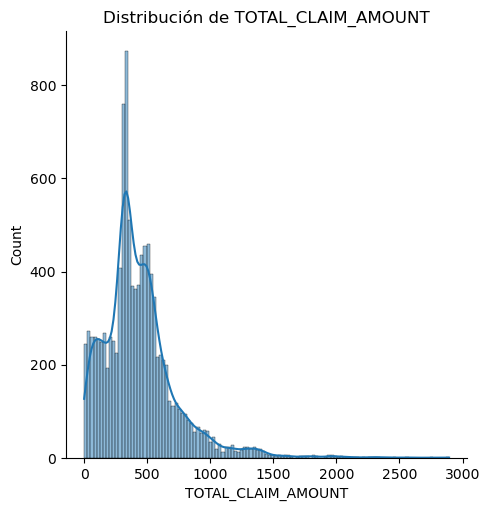

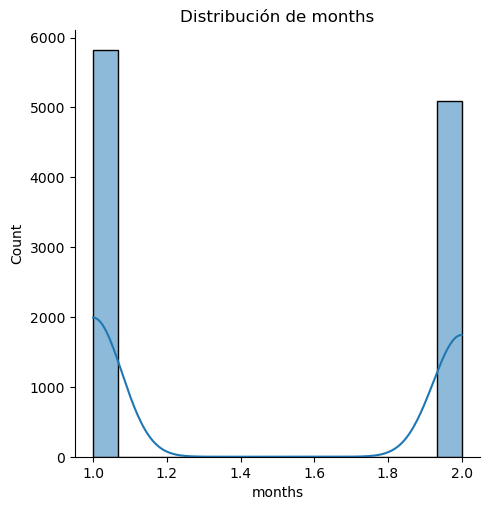

In [25]:
for col in numerical.columns:
    sns.displot(data=numerical, x=col, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

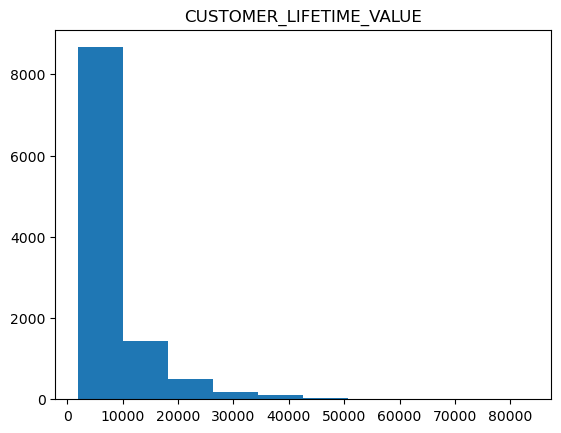

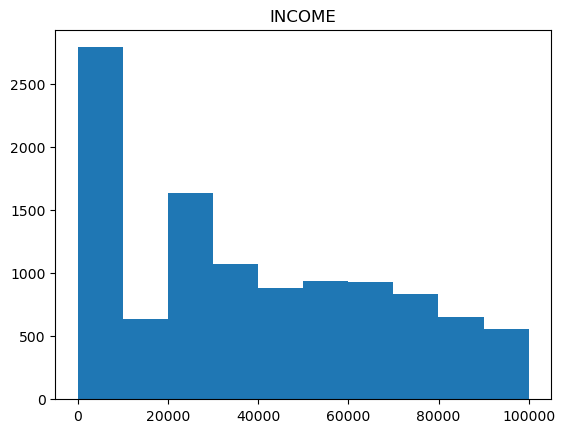

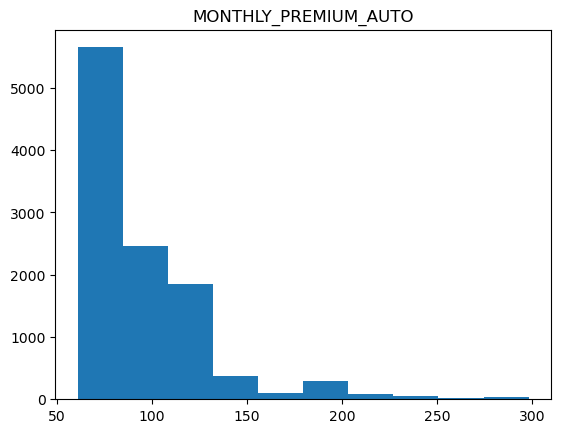

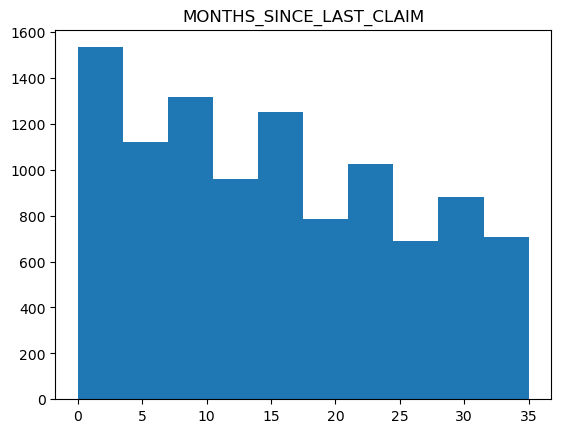

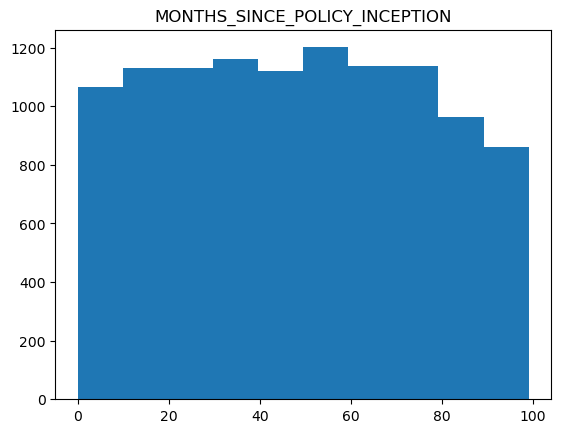

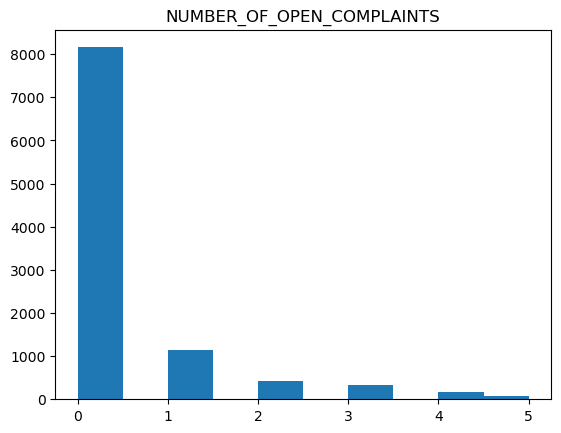

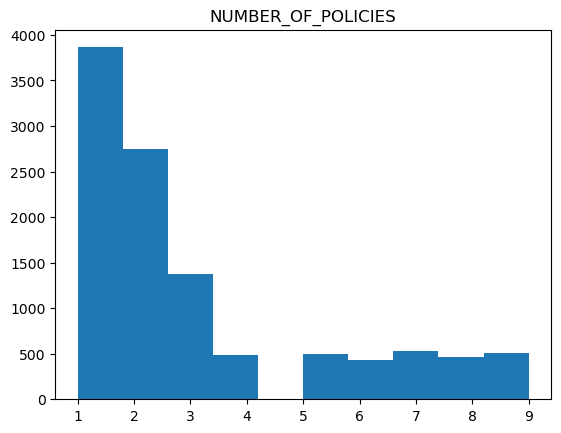

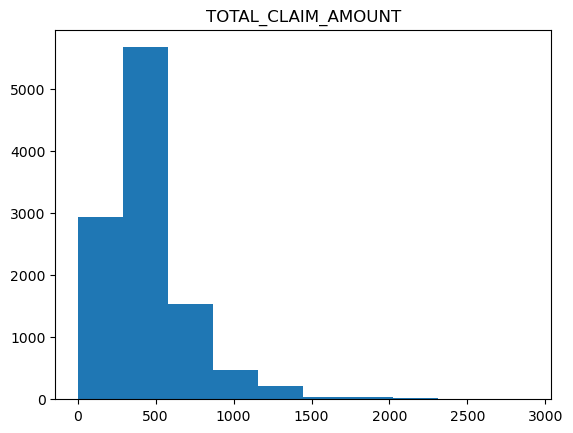

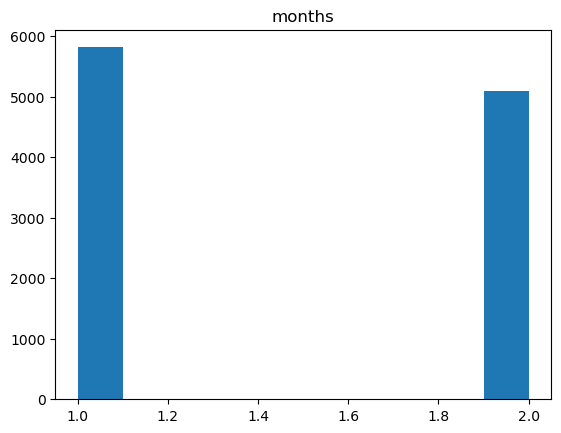

In [26]:
for col in numerical.columns:
    plt.hist(numerical[col])
    plt.title(col)
    plt.show()

In [27]:
#las distribuciones obtenidas no se asemejan a una distribución normal. 

In [40]:
numerical.isna().sum()

CUSTOMER_LIFETIME_VALUE            0
INCOME                             0
MONTHLY_PREMIUM_AUTO               0
MONTHS_SINCE_LAST_CLAIM          633
MONTHS_SINCE_POLICY_INCEPTION      0
NUMBER_OF_OPEN_COMPLAINTS        633
NUMBER_OF_POLICIES                 0
TOTAL_CLAIM_AMOUNT                 0
months                             0
dtype: int64

In [42]:
#trabajando los NaN pendientes. 
media1=np.mean(numerical['MONTHS_SINCE_LAST_CLAIM'])
media2=np.mean(numerical['NUMBER_OF_OPEN_COMPLAINTS'])
numerical['MONTHS_SINCE_LAST_CLAIM']=numerical['MONTHS_SINCE_LAST_CLAIM'].fillna(media1)
numerical['NUMBER_OF_OPEN_COMPLAINTS']=numerical['NUMBER_OF_OPEN_COMPLAINTS'].fillna(media2)

In [43]:
Y=numerical['TOTAL_CLAIM_AMOUNT']
X=numerical.drop('TOTAL_CLAIM_AMOUNT', axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     TOTAL_CLAIM_AMOUNT   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        10:17:30   Log-Likelihood:                -73410.
No. Observations:               10910   AIC:                         1.468e+05
Df Residuals:                   10901   BIC:                         1.469e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [47]:
#pruebo eliminar las columnas con maypr Pvalue.
numerical2=numerical.drop(['MONTHS_SINCE_LAST_CLAIM' , 'NUMBER_OF_POLICIES'] , axis=1)

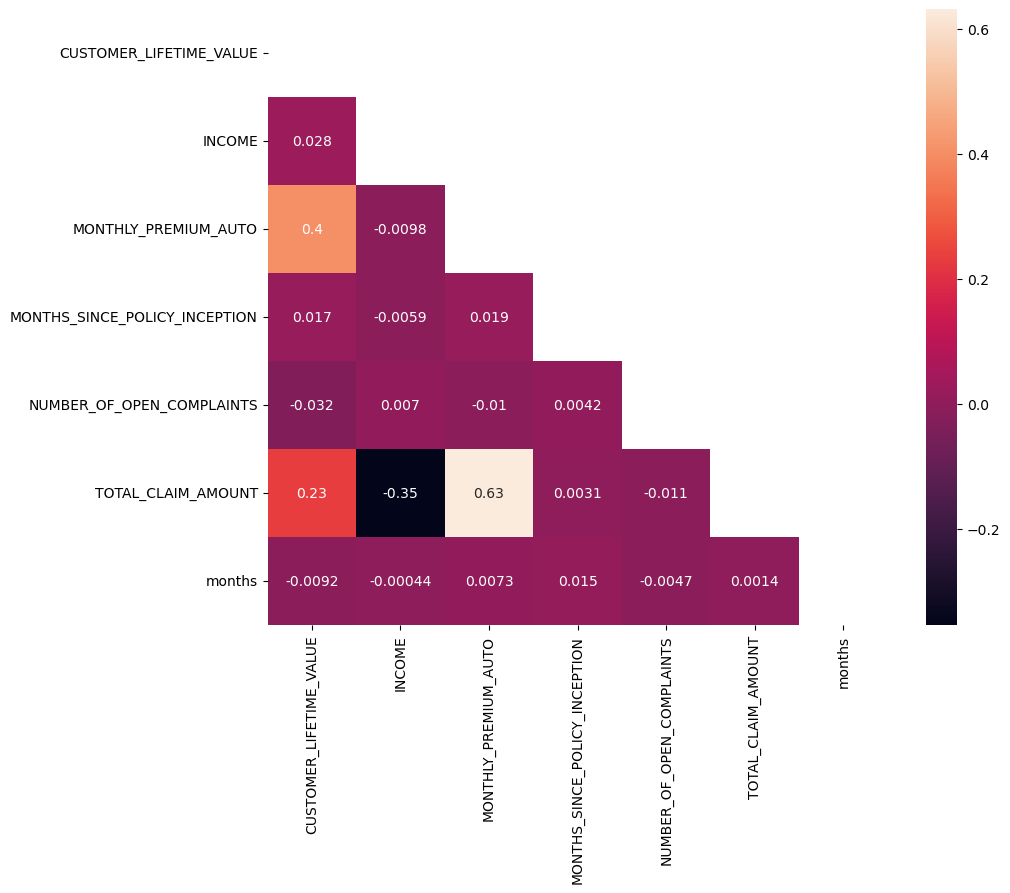

In [48]:
correlations_matrix = numerical2.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

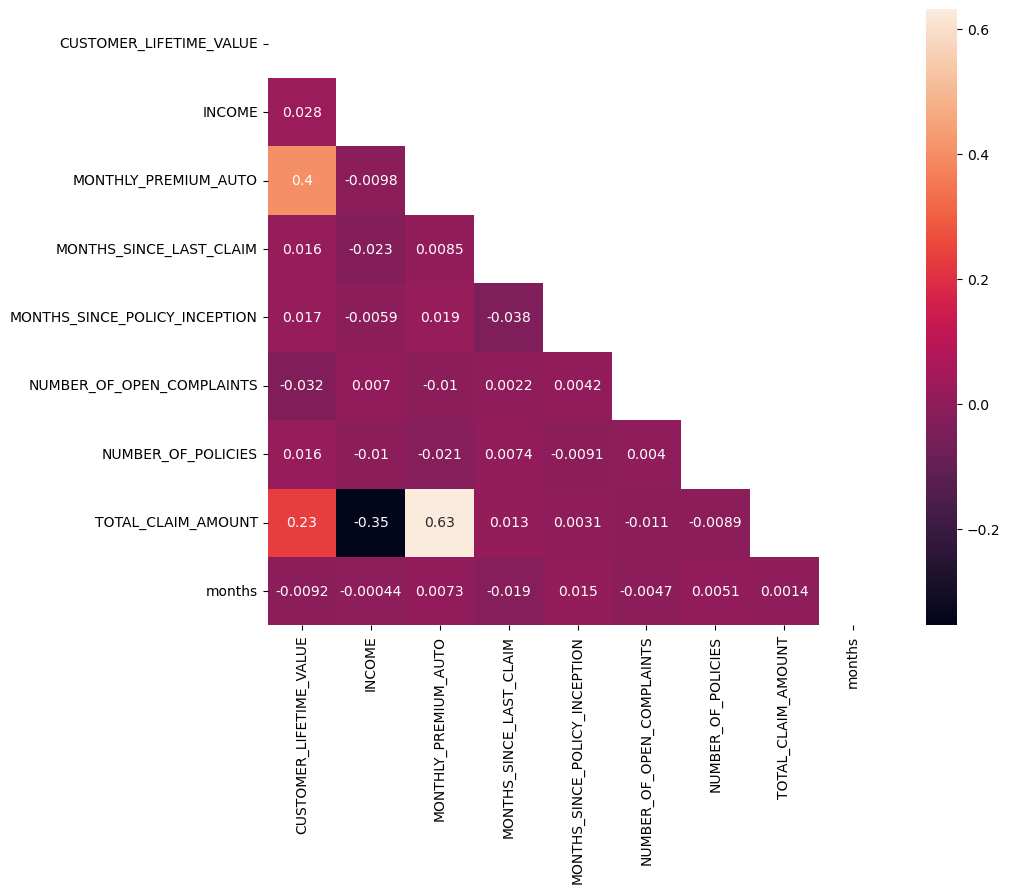

In [49]:
#heatmap sin borrar columnas.
correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()